<a href="https://colab.research.google.com/github/JeiGeek/ia1-LosPandas-prediccion_rendimiento_estudiantil/blob/main/01_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **Carga del dataset**

In [ ]:
# Carga desde github
url = "https://raw.githubusercontent.com/JeiGeek/ia1-LosPandas-prediccion_rendimiento_estudiantil/main/Dataset/StudentPerformanceFactors.csv"
df = pd.read_csv(url)

In [ ]:
# Información de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
#Hay nulos en el dataset
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Limpieza de nulos
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [ ]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


#**Exploratory Data Analysis**

## 1. Exploración de nuestra variable exam_score que es importante para saber el comportamiento de las nota y ver si se pueden predecir.

In [ ]:
# Se conocen los distintos datos de exam_score
display(df['Exam_Score'].describe())

,Exam_Score
count,6378.000000
mean,67.252117
std,3.914217
min,55.000000
25%,65.000000
50%,67.000000
75%,69.000000
max,101.000000


> La media y la mediana muestran que son parecidas por ende indican que no se acumulan mucho en los extremos.

> Se tiene un outlier en el maximo siendo 101 porque en lo general las nota van de 0 a 100.

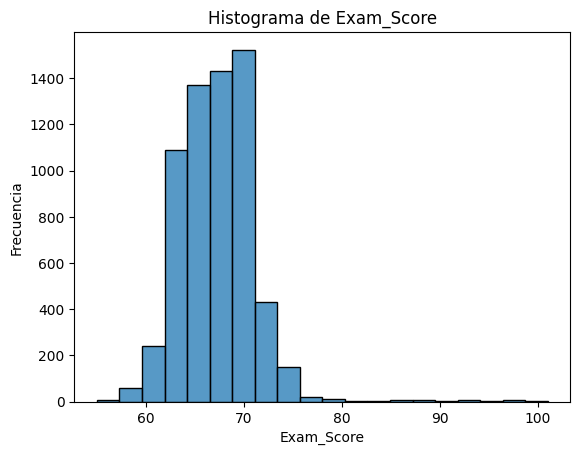

In [ ]:
# Histograma de exam_score
sns.histplot(df['Exam_Score'], bins=20)
plt.title('Histograma de Exam_Score')
plt.xlabel('Exam_Score')
plt.ylabel('Frecuencia')
plt.show()

> Con el histograma se identifica que la mayoria de estudiantes aprueban con notas medias no altisimas ni bajisimas.

A partir de esto se pueden identificar que es posible predecir la nota de un estudiante debido a que on hay sesgos fuertes y detectar estudiantes que podrían perder.

## 2. Revisión de variables númericas

La intención de revisar las variables númericas es reconocer si existen valores imposibles

In [ ]:
# Información básica de datos numericos

# select_dtypes - selecciona solo los datos de un tipo
# T - transpone la tabla para una mejor visualización
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.252117,3.914217,55.0,65.0,67.0,69.0,101.0


Se identificaron alguna variables fuertes es decir que pueden relacionarse bien con exam_score:

> **Previous_score** porque los estudiantes que ya venían con buenas notas, probablemente suelen mantenerlas.

> **Hours_Studied** porque puede ser que a más horas estudiadas, mejor desempeño.

> **Attendance** porque los que mas asisten deberían rendir mejor.

Ademas no se identifican valores numericos imposibles y ya con estos se obtuvieron los primeros supuestos.

## 3. Correlacion entre las variables y Exam_Score

Se reconoce si verdaderamente lo supuestos y otras variables se correlacionan con exam_score o por el contrario no.

Primero se mapean la variables para realizar la correlacion

In [ ]:
# Se aplica el metodo de One-Hot Encoding para la correlación->  Convertir variables categóricas en números
# Hay 13 variables de tipo categoricas

df_encoded = df.copy()

# Categorizacion binaria para categorias que son solo 2 dos tipos

# get_dummies - Convierte tablas categoricas en binarios
# drop_first - quita la columna redudante que se genera
df_encoded = pd.get_dummies(df_encoded, columns=["Extracurricular_Activities", "Internet_Access", "School_Type", "Learning_Disabilities", "Gender"], drop_first=True)

# Categorizacion por categorias que son de 3 tipos

# para categorias bajo - medio - alto
mapping = {"Low":1, "Medium":2, "High":3}
columnas = ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Family_Income", "Teacher_Quality"]

for columna in columnas:
    df_encoded[columna] = df_encoded[columna].map(mapping)

# para categoria negativo - positivo - neutral
mapping = {"Negative":-1, "Positive":1, "Neutral":0}
df_encoded["Peer_Influence"] = df_encoded["Peer_Influence"].map(mapping)

# para categoria High School - College - Postgraduate
mapping = {"High School":1, "College":2, "Postgraduate":3}
df_encoded["Parental_Education_Level"] = df_encoded["Parental_Education_Level"].map(mapping)

# para categoria Near - Moderate - Far
mapping = {"Near":1, "Moderate":2, "Far":3}
df_encoded["Distance_from_Home"] = df_encoded["Distance_from_Home"].map(mapping)


# Convertir las columnas booleanas resultantes en 0 y 1
bool_cols = df_encoded.select_dtypes(include=["bool"]).columns # Se seleccionan las columnas solamente las columnas booleanas
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int) # Se convierten en 0 y 1

Se realiza la matriz de correlacion y la correlaciones con exam_score

In [ ]:
# Matriz de correlación
corr = df_encoded.corr()

# Mostrar solo con Exam_Score
display(corr['Exam_Score'].sort_values(ascending=False))

,Exam_Score
Exam_Score,1.000000
Attendance,0.580259
Hours_Studied,0.445104
Previous_Scores,0.174283
Access_to_Resources,0.167856
Tutoring_Sessions,0.156829
Parental_Involvement,0.156014
Parental_Education_Level,0.105253
Peer_Influence,0.099133
Family_Income,0.094555



> **Attendance 0.58** - La asistencia tiene la mayor relación, a más asistencia, mejor nota.

> **Hours_Studied 0.44** - Las horas de estudio también importan bastante.

> **Previous_Scores 0.17** - Tambien presenta relacion positva pero más débil

> **Gender_Male -0.004, School_Type_Public -0.01, Sleep_Hours -0.017** - prácticamente no influyen en la nota.

> **Learning_Disabilities_Yes -0.08** - Los estudiantes con dificultades de aprendizaje tienden a sacar notas más bajas.

> **Distance_from_Home -0.088** - mayor distancia desde la casa al colegio se asocia con notas más bajas.

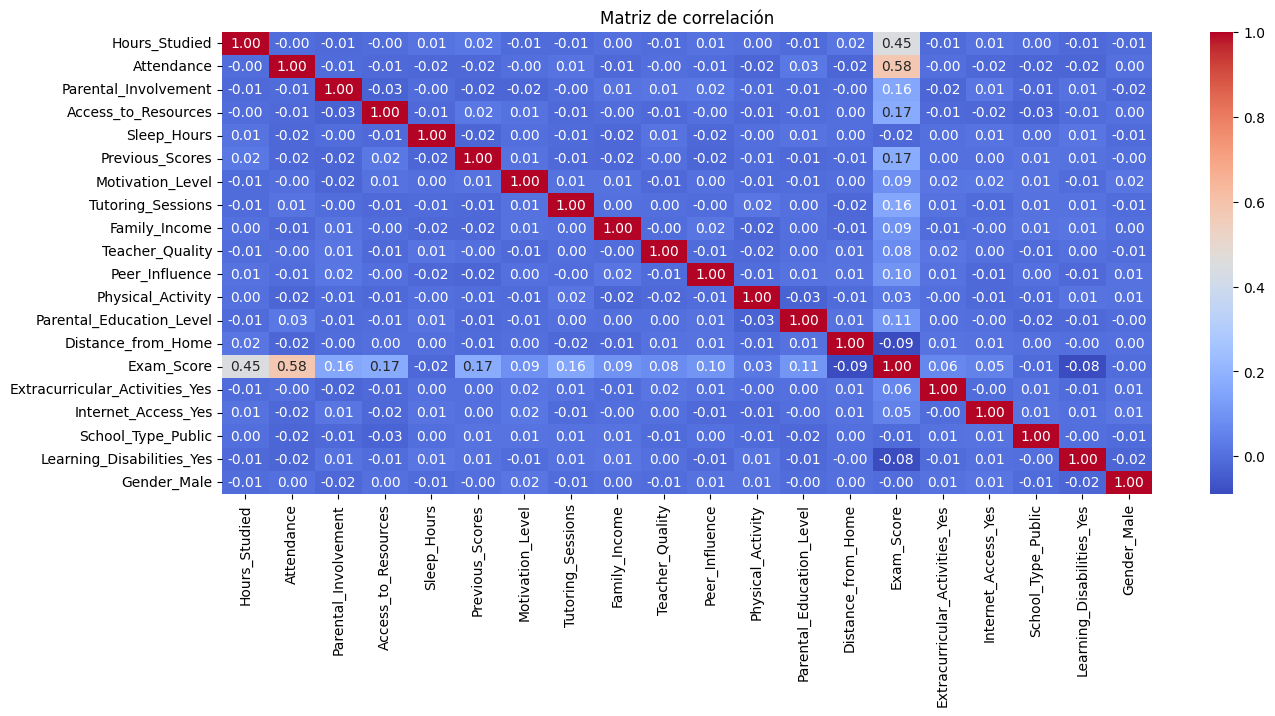

In [ ]:
# Heatmap completo
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

## 4. Gráficos de dispersión entre variables claves a conocer y exam_score

Text(0, 0.5, 'Exam_Score')

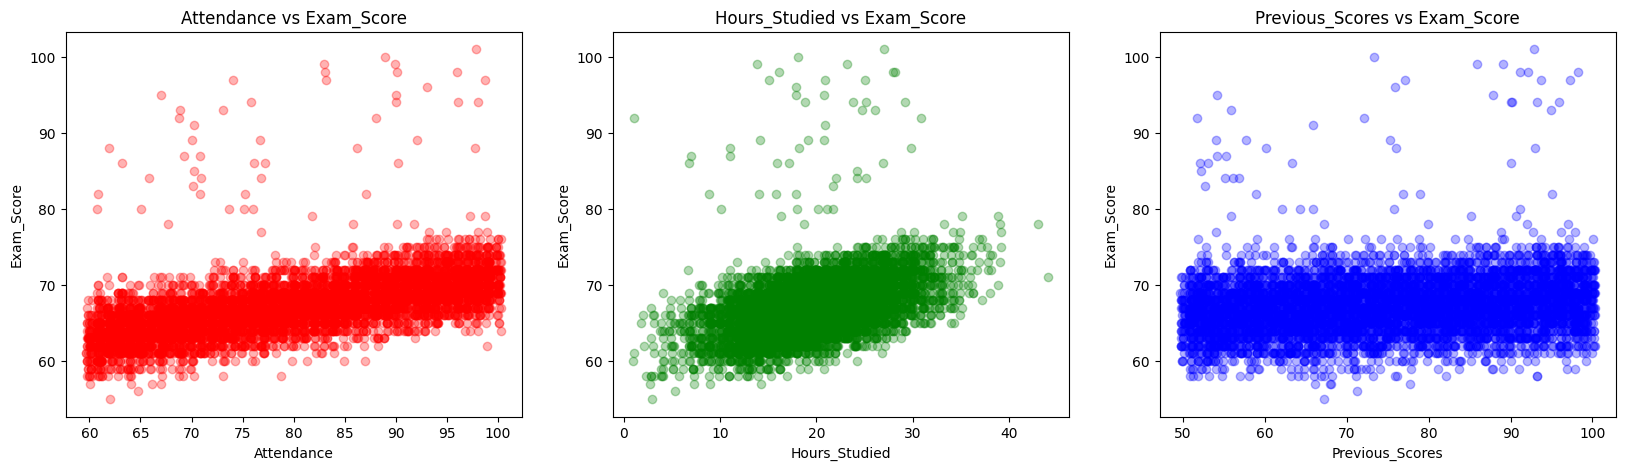

In [ ]:
# Gráficos de dispersión
fig, axs = plt.subplots(1,3, figsize=(20,5))

# np.random.uniform(-0.3, 0.3, size=len(df)) - generacion de un poco de ruido para no tener los datos tan superpuestos
# Corre los datos un aleatoriamente un poco para que no queden tan encima
axs[0].scatter(df_encoded['Attendance']+ np.random.uniform(-0.3, 0.3, size=len(df_encoded)), df_encoded['Exam_Score'], alpha = 0.3, color = "red")
axs[0].set_title('Attendance vs Exam_Score')
axs[0].set_xlabel('Attendance')
axs[0].set_ylabel('Exam_Score')

axs[1].scatter(df_encoded['Hours_Studied']+ np.random.uniform(-0.3, 0.3, size=len(df_encoded)), df_encoded['Exam_Score'], alpha = 0.3, color = "green")
axs[1].set_title('Hours_Studied vs Exam_Score')
axs[1].set_xlabel('Hours_Studied')
axs[1].set_ylabel('Exam_Score')

axs[2].scatter(df_encoded['Previous_Scores']+ np.random.uniform(-0.3, 0.3, size=len(df_encoded)), df_encoded['Exam_Score'], alpha = 0.3, color = "blue")
axs[2].set_title('Previous_Scores vs Exam_Score')
axs[2].set_xlabel('Previous_Scores')
axs[2].set_ylabel('Exam_Score')


In [ ]:
#@title **code student**
def quiz02_c1_20252_p02(data_h):
    import pandas as pd
    import numpy as np
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.model_selection import KFold, cross_val_score
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

    X = data_h[["TALLA", "TIEMPOGESTACION", "NUMEROCONSULTASPRENATALES","SEXO"]].copy()
    y = data_h["PESO"].copy()

    kf = KFold(5, shuffle=True, random_state=7)
    model = DecisionTreeRegressor(max_depth = 5, random_state = 7)

    s_mae = cross_val_score(model, X, y, cv = kf, scoring = make_scorer(mean_absolute_error))
    s_mse = cross_val_score(model, X, y, cv = kf, scoring = make_scorer(mean_squared_error))
    s_r2  = cross_val_score(model, X, y, cv = kf, scoring = make_scorer(r2_score))

    metrics = {'MAE_promedio': s_mae.mean(), 'MSE_promedio': s_mse.mean(), 'R2_promedio': s_r2.mean() }

    importances = np.zeros(X.shape[1])
    for train, test in kf.split(X):
        model.fit(X.iloc[train], y.iloc[train])
        importances += model.feature_importances_

    importances /= 5

    idx = importances.argsort()[-3:][::-1]
    top3_dict = dict(zip(X.columns[idx], importances[idx]))

    return metrics, top3_dict

In [ ]:
def quiz02_c1_20252_p04(data):
    import numpy as np
    import tensorflow as tf
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.optimizers import Adam
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    tf.keras.utils.set_random_seed(42)
    np.random.seed(42)

    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target

    X = df.drop(columns = ['target'])
    y = df['target']

    kf = KFold(5, shuffle=True, random_state=42)

    foldis = []

    for train, test in kf.split(X):
      X_train = X.iloc[train]
      X_test = X.iloc[test]

      y_train = y.iloc[train]
      y_test = y.iloc[test]

      scaler = StandardScaler()
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)

      model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='tanh'),
        tf.keras.layers.Dense(1)  # Salida binaria
      ])

      model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae'],
      )

      model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=0,
      )

      y_pred = model.predict(X_test)

      mse = mean_squared_error(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)

      metricas = (mse, mae)

      foldis.append(metricas)

      last_model = model

    fold_scores = foldis
    fold_scores2 = np.array(foldis)

    summary = {
        'MSE_mean': fold_scores2[:,:1].mean(),
        'MSE_std':  fold_scores2[:,:1].std(ddof=1),
        'MAE_mean': fold_scores2[:,1:].mean(),
        'MAE_std': fold_scores2[:,1:].std(ddof=1)
    }

    return fold_scores, summary, last_model